Alec Brunelle, Student # 999241315  
Spencer Elliott, Student # 999992539

# Sequential write to file

We experimented writing a 100-mebibyte (MiB) file to four different mediums (solid-state drive, hard disk drive, USB flash drive, DFS) using various block sizes ranging from 128 bytes to 2 MiB:
* 128 B
* 512 B
* 1 KiB
* 4 KiB
* 8 KiB
* 64 KiB
* 128 KiB
* 512 KiB
* 1 MiB
* 2 MiB

For each block size, 50 randomly-generated files were written, to account for minor variations between subsequent runs and make the resulting plots more evenly-distributed.

## Solid-state drive
`./experiment_create_random_file.py` was run on a 2014 MacBook Pro (running MacOS 10.12) using a solid-state drive (formatted as Mac OS Extended (Journaled)) with results collected in a file `results_ssd_write.csv`, summarized below:

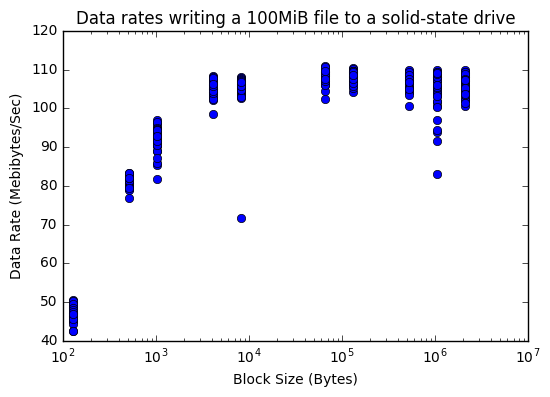

In [136]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure

def get_data(csvfile):
    reader = csv.DictReader(csvfile)
    return zip(*[
        (
            row['block_size'], 
            row['milliseconds_elapsed'],
            # calculate data rate: mebibytes / second
            (
                # convert bytes -> mebibytes
                (int(row['total_size']) / 2 ** 20)
                /
                # convert milliseconds -> seconds
                (int(row['milliseconds_elapsed']) / 1000)
            )
        )
        for row in reader
    ])

with open('./results_ssd_write.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.title(
        'Data rates writing a 100MiB file ' +
        'to a solid-state drive'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Data Rate (Mebibytes/Sec)')
    plt.xscale('log')
    plt.plot(x, rates, 'bo')
    
    plt.show()

### Analysis
The data rates appear to increase up until the block size of 4 KiB, after which the data rate levels out between the range of approximately 100MiB/s and 110MiB/s.

Because SSDs can only write data in "pages" (the smallest unit of data which can be written at once), using a block size smaller than the page size of the SSD causes the same SSD page to be loaded into memory and then written back to the SSD multiple times. It's likely that the first three block sizes of 128 B, 512 B, and 1 KiB caused this costly behaviour since they are less than the page size of the SSD.

Since block sizes of 4 KiB and larger all had similar performance, it's possible that the SSD page size (and thus, the optimal block size) was approximately 4 KiB.

## Hard disk drive
`./experiment_create_random_file.py` was run on an external USB 3.0 hard disk drive (formatted as Mac OS Extended (Journaled)) with results collected in a file `results_hdd_write.csv`, summarized below:

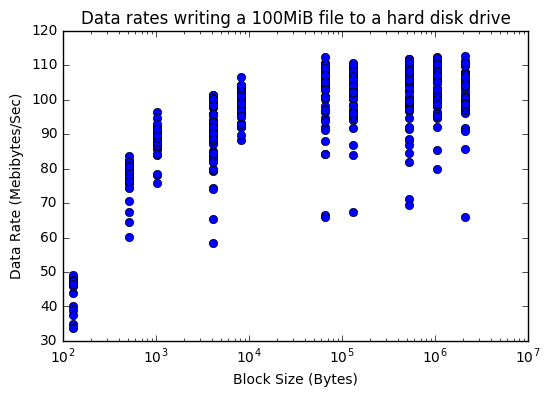

In [137]:
%matplotlib inline

with open('./results_hdd_write.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.title(
        'Data rates writing a 100MiB file ' +
        'to a hard disk drive'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Data Rate (Mebibytes/Sec)')
    plt.xscale('log')
    plt.plot(x, rates, 'bo')
    
    plt.show()

### Analysis
The data rates appear to increase up until the block size of 64 KiB, after which the data rate levels out between the range of approximately 80MiB/s and 110MiB/s.

HDDs perform best when writing longer sequences of bytes at once; writing short sequences causes the disk to spend time seeking & rotating between writes. Likely due to this behaviour, the first five block sizes of 128 B, 512 B, 1 KiB, 4 KiB, and 8 KiB had poorer performance than block sizes 64 KiB and larger.

## USB flash drive
`./experiment_create_random_file.py` was run on a USB 3.0 flash drive (formatted as Mac OS Extended (Journaled)) with results collected in a file `results_usb_write.csv`, summarized below:

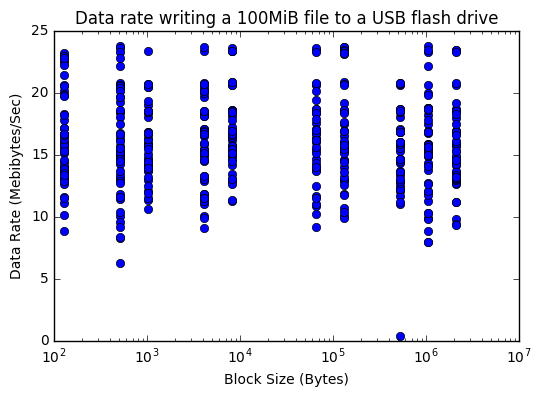

In [138]:
%matplotlib inline

with open('./results_usb_write.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.title(
        'Data rate writing a 100MiB file ' +
        'to a USB flash drive'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Data Rate (Mebibytes/Sec)')
    plt.xscale('log')
    plt.plot(x, rates, 'bo')
    
    plt.show()

## Distributed file system
`./experiment_create_random_file.py` was run on the CS Teaching Labs using a distributed file system (DFS) with results collected in a file `results_dfs_write.csv`, summarized below:

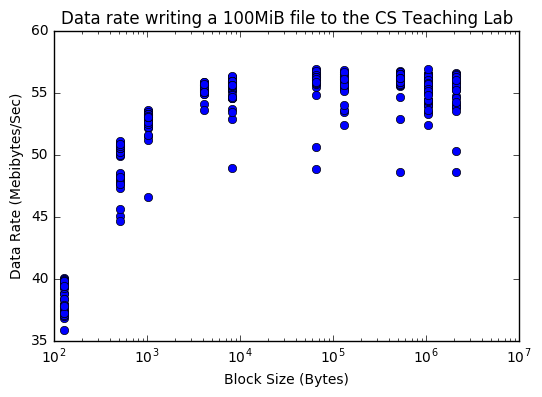

In [139]:
%matplotlib inline

with open('./results_dfs_write.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.title(
        'Data rate writing a 100MiB file ' +
        'to the CS Teaching Lab'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Data Rate (Mebibytes/Sec)')
    plt.xscale('log')
    plt.plot(x, rates, 'bo')

    plt.show()

## Comparison
Solid-state drive, hard disk drive, and distributed file system all showed a lower data rate for smaller block sizes, but the SSD data rate levelled off at the 4 KiB block size, sooner than the other mediums which levelled off at around the 64 KiB block size. This suggests that the optimal SSD block size is close to 4 KiB, while the optimal block size for the other mediums is closer to 64 KiB.

The odd case was the USB flash drive, which had the same performance regardless of block size.

# Sequential read from file

We experimented reading a 100-mebibyte (MiB) file from to four different mediums (solid-state drive, hard disk drive, USB flash drive, DFS) using various block sizes ranging from 128 bytes to 2 MiB:
* 128 B
* 512 B
* 1 KiB
* 4 KiB
* 8 KiB
* 64 KiB
* 128 KiB
* 512 KiB
* 1 MiB
* 2 MiB

## Solid-state drive
`./experiment_get_histogram.py` was run on a 2014 MacBook Pro (running MacOS 10.12) using a solid-state drive (formatted as Mac OS Extended (Journaled)) with results collected in a file `results_ssd_read.csv`, summarized below:

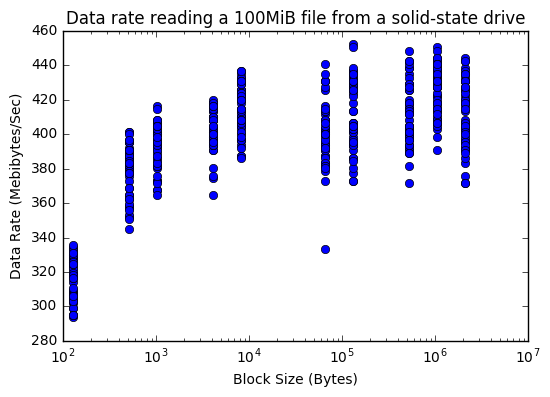

In [140]:
%matplotlib inline

with open('./results_ssd_read.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.title(
        'Data rate reading a 100MiB file ' +
        'from a solid-state drive'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Data Rate (Mebibytes/Sec)')
    plt.xscale('log')
    plt.plot(x, rates, 'bo')
    
    plt.show()

### Analysis
The data rates appear to increase up until the block size of 8 KiB, after which the data rate levels out between the range of approximately 380MiB/s and 440MiB/s.

Similar to writes, SSDs must read data in "pages" (the smallest unit of data which can be read at once). At block sizes smaller than the SSD's read page size, the same page must be read multiple times to read a fixed amount of data. It's likely that the first four block sizes of 128 B, 512 B, 1 KiB, and 4 KiB caused this costly behaviour since they are less than the page size of the SSD.

Since block sizes of 4 KiB and larger all had similar performance, it's possible that the SSD page size (and thus, the optimal block size) was approximately 4 KiB.

## Hard disk drive

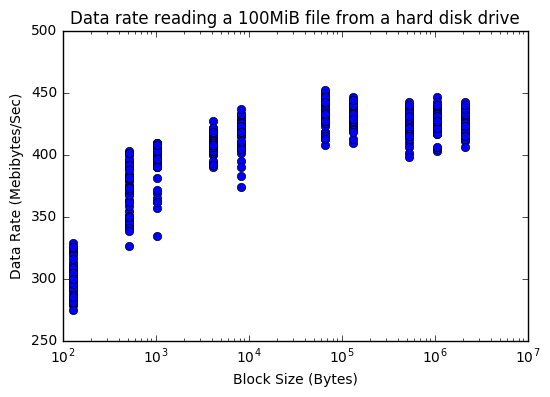

In [141]:
%matplotlib inline

with open('./results_hdd_read.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.title(
        'Data rate reading a 100MiB file ' +
        'from a hard disk drive'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Data Rate (Mebibytes/Sec)')
    plt.xscale('log')
    plt.plot(x, rates, 'bo')
    
    plt.show()

### Analysis
The data rates appear to increase up until the block size of 64 KiB, after which the data rate levels out between the range of approximately 400MiB/s and 450MiB/s.

Similar to writing, HDDs perform best when reading longer sequences of bytes at once; reading short sequences causes the disk to spend time seeking & rotating between reads. Likely due to this behaviour, the first five block sizes of 128 B, 512 B, 1 KiB, 4 KiB, and 8 KiB had poorer performance than block sizes 64 KiB and larger.

## USB flash drive

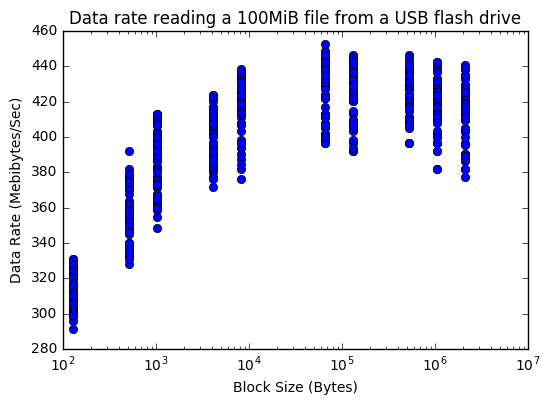

In [142]:
%matplotlib inline

with open('./results_usb_read.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.title(
        'Data rate reading a 100MiB file ' +
        'from a USB flash drive'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Data Rate (Mebibytes/Sec)')
    plt.xscale('log')
    plt.plot(x, rates, 'bo')
    
    plt.subplots_adjust(top=0.92)
    plt.show()

## Distributed file system

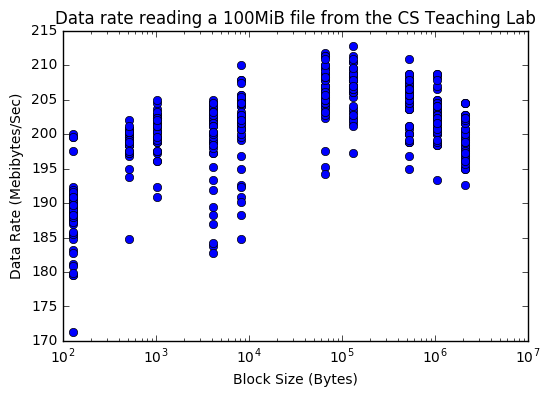

In [143]:
%matplotlib inline

with open('./results_dfs_read.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.title(
        'Data rate reading a 100MiB file ' +
        'from the CS Teaching Lab'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Data Rate (Mebibytes/Sec)')
    plt.xscale('log')
    plt.plot(x, rates, 'bo')
    
    plt.show()